# Sheet 1

## 1)

### a:

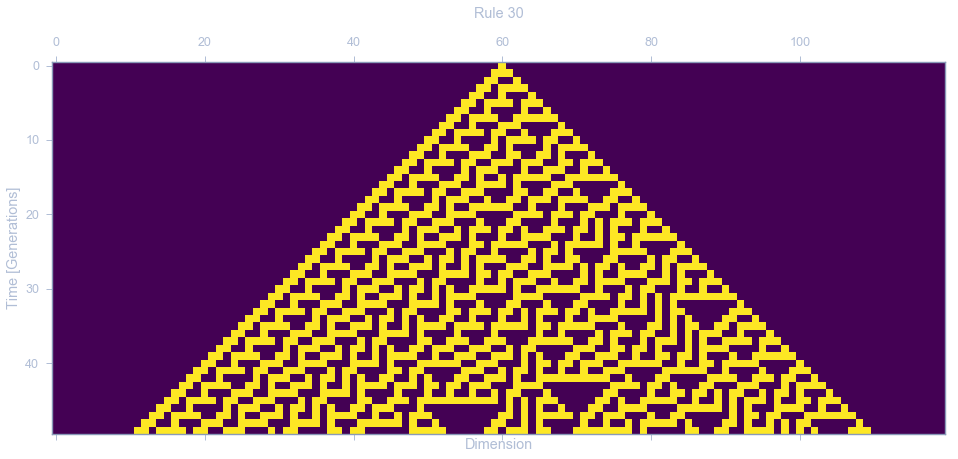

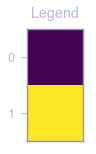

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

time= 50 #how many generations should be calculated
dim= 120 #what the dimension of each generation should be
initialState= np.zeros(dim, dtype= bool) #defining the initial configuration
initialState[60]= 1
exFlag= 1 # confirms execution of this cell for next cell

def rule30(c, init):
    """
    applies rule 30 with boundary conditions boundary=0
    param:
    c: (empty) numpy array of dimensions [No. of generations , dimension of each generation]
        this is the array to be operated upon, will be initialized by this function 
    init: numpy array with dimension [dimension of the generation] 
        contains initial configurations
    return:  
    c: but also edits c in-place
    """
    c[0]= init #initialize the first configuration
    for i in range(1, c.shape[0]): #go over all generations, beginning after the initial one
        c[i,0]= (c[i-1, 0] | c[i-1, 1]) #left boundary
        for j in range(1, c.shape[1]-1): #go through the 'body' of the generation with normal condition
            c[i,j]= c[i-1, j-1] ^ (c[i-1, j] | c[i-1, j+1]) #rule 30 in reduced form
        c[i, c.shape[1]-1]= c[i-1, c.shape[1]-2] #right boundary
    return c

config= np.zeros((time, dim), dtype= bool) #set up array for all generations to be calculated
rule30(config, initialState) #apply rule 30 to the array with the initial configuration

#visualize the array
plt.figure(0, figsize= [16,9])
plt.matshow(config, fignum=0)
plt.title("Rule 30", pad=25)
plt.xlabel("Dimension")
plt.ylabel("Time [Generations]")
#show a legend for previous visualization
plt.figure(1, figsize=[1,2])
plt.matshow([[0],[1]], fignum=1)
plt.title("Legend")
plt.xticks([]);

### b:

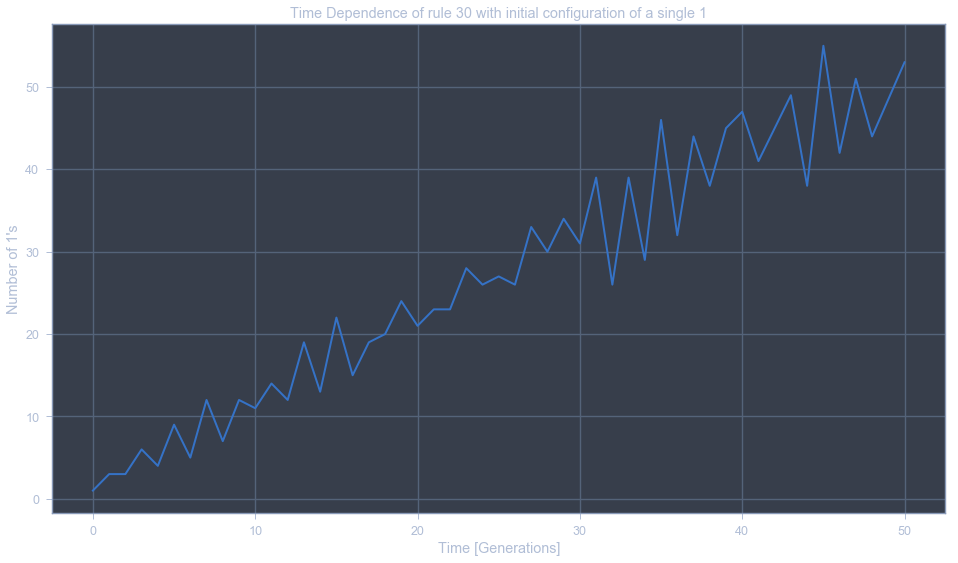

In [3]:
import numpy as np

def timeDependence(c):
    """
    calculates the time dependence of a given array. 
    param: 
        c: numpy array of dimensions [No. of generations , dimension of each generation]:
            array of which the time dependence is calculated
    return:
        a: numpy array of dimension [No. of generations]:
            array with count of cells with entry '1' for each generation
    """
    a= np.empty(c.shape[0], dtype=int)
    for i in range(0, c.shape[0]):
        a[i]= np.sum(c[i]).astype(int)
    return a

try: 
    dummy=exFlag # verify execution of previous cell    
    T= np.linspace(0, config.shape[0], dtype=int) # x-axis (time)
    X= timeDependence(config) #values to be plotted against time, calculated via timeDependence 
    #plot graph
    plt.figure(0, figsize=[16,9])
    plt.plot(T, X, lw=2)
    plt.grid()
    plt.title("Time Dependence of rule 30 with initial configuration of a single 1")
    plt.xlabel("Time [Generations]")
    plt.ylabel("Number of 1's");
except:
    print("execute previous cell")

### c:
There are no rules which reproduce the exact pattern of rule 30 for _any_ input, but if one constraints this to the condition of reproduction up to **mirroring** or **inverion**, there are 3 other rules which archive this: rule 86 (mirror), rule 135 (inversion) and rule 149 (mirror-inversion)

## 2)

In [7]:
import numpy as np

def betterTickGOL(op):
    """
    Does one game of life iteration on numpy array (dtype=bool) grid and returns it.
    """
    erg= np.zeros(op.shape, dtype=bool) #returned array
    xD= op.shape[0]
    yD= op.shape[1]
    for x in range(0,xD):
        for y in range(0,yD):#step through each cell
            count=op[(x-1)%xD,(y-1)%yD]+op[(x-1)%xD,y]+op[x,(y-1)%yD]+op[(x+1)%xD,(y+1)%yD]+op[x,(y+1)%yD]+op[(x+1)%xD,y]+op[(x+1)%xD,(y-1)%yD]+op[(x-1)%xD,(y+1)%yD] #neighbors
            if op[x,y]: #distinguish if the effected cell is already filled
                if count>1 and count <4: #keep cell alive if conditions are met
                    erg[x-1,y-1]=1
            else:
                if count==3: #activate dead cell if it has exactly three neighbors
                    erg[x-1,y-1]=1
    return erg #return next generation

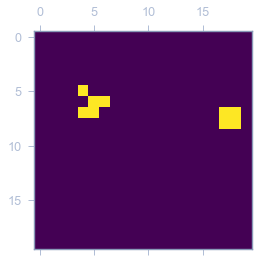

In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

mpl.rcParams['animation.html'] = 'jshtml' #enabeling animation
mpl.rcParams['animation.embed_limit']= 60.0 #allocating more memory to animation

dims= [20,20] #dimensions for the grid
periodicBoundary= True #sets the boundary condition: False=> boundary=0's (unimplemented)
exFlag2= 1 # confirms execution of this cell for next cell

def tickGOL(grid):
    """
    Does one game of life iteration on numpy array (dtype=bool) grid and returns it.
    """
    #setup of periodic boundary conditions via copying (optimitze via modulo and rewriting the count calculation)
    op= np.zeros([grid.shape[0]+2, grid.shape[1]+2], dtype=bool)
    #body
    op[1:grid.shape[0]+1,1:grid.shape[1]+1]= grid
    #edges
    op[1:grid.shape[0]+1, 0]= grid[:, grid.shape[1]-1]
    op[1:grid.shape[0]+1, op.shape[1]-1]= grid[:, 0]
    op[0, 1:grid.shape[1]+1]= grid[grid.shape[0]-1, :]
    op[op.shape[0]-1, 1:grid.shape[1]+1]= grid[0,:]
    #corners
    op[0,0]= grid[grid.shape[0]-1,grid.shape[1]-1]
    op[op.shape[0]-1, op.shape[1]-1]= grid[0,0]
    op[0, op.shape[1]-1]= grid[grid.shape[0]-1,0]
    op[op.shape[0]-1, 0]= grid[0,grid.shape[1]-1]
    
    erg= np.zeros(grid.shape, dtype=bool) #returned array
    for x in range(1,grid.shape[0]+1):
        for y in range(1, grid.shape[1]+1):#step through each cell
            count= np.sum(op[(x-1):(x+2), (y-1):(y+2)])-op[x,y] #calculate number of populated Neighbors
            if op[x,y]: #distinguish if the effected cell is already filled
                if count>1 and count <4: #keep cell alive if conditions are met
                    erg[x-1,y-1]=1
            else:
                if count==3: #activate dead cell if it has exactly three neighbors
                    erg[x-1,y-1]=1
    return erg #return next generation

g= np.zeros(dims, dtype=bool) #blank array
#initial configuration
g[7,17]= 1
g[8,17]= 1
g[7,18]= 1
g[8,18]= 1

g[10,10]=1
g[11,11]=1
g[12,9]= 1
g[12,10]=1
g[12,11]=1
"""#non-animated
plt.figure(0, figsize=[5,5])
plt.matshow(g, fignum=0)
plt.xticks(np.arange(0,g.shape[1])-0.5, [""]*g.shape[1])
plt.yticks(np.arange(0,g.shape[0])-0.5, [""]*g.shape[0])
plt.grid(which="both")
i=1
for i in range(1,13):
    g= tickGOL(g)
    plt.figure(i, figsize=[5,5])
    plt.matshow(g, fignum=i)
    plt.xticks(np.arange(0,g.shape[1])-0.5, [""]*g.shape[1])
    plt.yticks(np.arange(0,g.shape[0])-0.5, [""]*g.shape[0])
    plt.grid(which="both")
#"""
#animation: number of frames must be specified beforehand due to limitations with jupyter notebook
fig = plt.figure(0) #set up figure to be animated
ims = [] #list in which the animator objects will be stored
for i in range(300):
    im = plt.matshow(g, fignum=0, animated=True) #convert current state of g to animator
    ims.append([im]) #append animator to list
    g=tickGOL(g) #do one step of the game of life
#create and show animation
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True, repeat=False)
HTML(ani.to_jshtml())
#"""

### c:

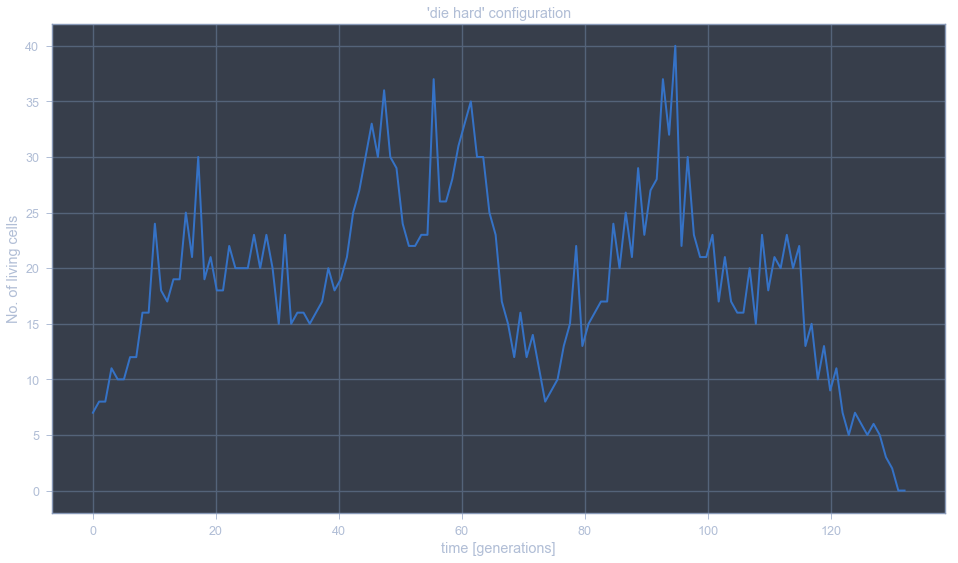

In [5]:
try:
    dummy= exFlag2
    dim=[30,25] #dimensions of the grid to be simulated
    k= np.zeros(dim, dtype=bool) #create blank grid
    #starting configuration
    k[10,4]= 1
    k[10,5]= 1
    k[11,5]= 1
    k[11,9]= 1
    k[11,10]= 1
    k[11,11]= 1
    k[9,10]= 1
    
    N=132 #how many times the GOL should be simulated on the configuration
    T= np.linspace(0,N, N) #x-axis (time)
    X= np.zeros(N, dtype=int) #values to be plotted
    for i in range(0,N):
        X[i]= np.sum(k) #sum up all living cells in values-array
        k= tickGOL(k) #advance by one generation
    #plot graph
    plt.figure(-1,figsize=[16,9])
    plt.plot(T, X, lw=2)
    plt.grid()
    plt.title("'die hard' configuration")
    plt.xlabel("time [generations]")
    plt.ylabel("No. of living cells")
except:
    print("execute previous cell")

In [10]:
#test for efficiency of code
gra= np.zeros([100,100],dtype=bool)
for i in range(0,33):
    for j in range(0,33):
        gra[i*3, j*3]= 1
        gra[i*3-1, j*3]= 1
        gra[i*3, j*3-1]= 1
        gra[i*3-1, j*3-1]= 1

grb= np.copy(gra)

def testA(gr):
    gr=tickGOL(gr)
def testB(gr):
    gr=betterTickGOL(gr)

%timeit -n10 -r100 testA(gra) #takes around one minute
%timeit -n10 -r100 testB(grb)

58.9 ms ± 3.04 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)
113 ms ± 4.38 ms per loop (mean ± std. dev. of 100 runs, 10 loops each)


## 3)

### a:

In [42]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

N=50 #dimension of array for rule 184
p= 0.5 #probability of generating a living cell in initial configuration
nt= 100 #number of times rule 184 should be applied
exFlag3=1 #to verify execution of cell

def rule184(u):
    """
    applies rule 184 to numpy array u (dtype=bool) with periodic boundary conditions
    returns: new numpy array (dtype=bool) of same dimension which has the rule applied
    """
    m= np.zeros(u.shape[0], dtype=bool) #return array
    l=u.shape[0]
    for i in range(0, l): #go through 'body' of array
        m[i]= (u[(i-1)%l] and not u[i]) or (u[i] and u[(i+1)%l]) #'normal' rule 184 in reduced form
    return m

def getFlow(p, N, NTimeSteps, reps=100):
    """
    returns the average Flow of rule 184 with periodic boundary conditions on an array
    with N cells and a probability p of having live cells in the starting configuration
    for NTimeSteps executions of the rule. This will be averaged over reps repetitions. 
    """ 
    f= 0 #flow
    for i in range(0,reps): #repeat the calculation of the flow 100 times, average afterwards
        tube= np.random.rand(N)<p #generate random initial condition with prob. of living cell p
        s=0 #sum of 'exiting' cells
        for i in range(0,NTimeSteps): 
            s+= (not tube[0]) and tube[tube.shape[0]-1] #if a cell is 'leaving', add it to the total
            tube= rule184(tube) #applie rule 184 to current state
        f+= s/NTimeSteps #add the calculated flow of current simulation to the average flow
    return f/reps #average the flow of the 100 simulations

print("average flow: ",getFlow(p, N, nt)) #print the result

average flow:  0.43389999999999984


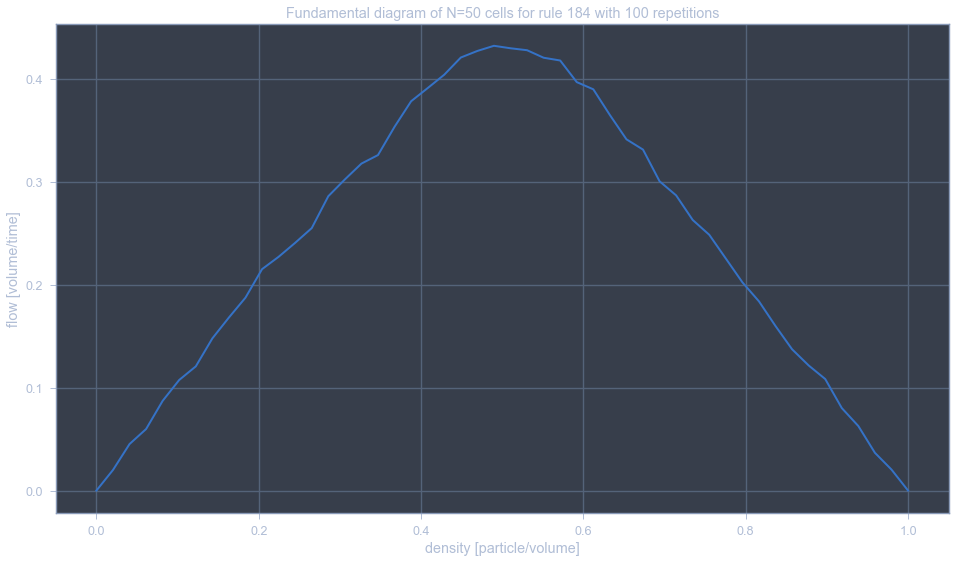

In [46]:
try:
    dummy= exFlag3 #verify execution of previous cell
    N=50 #dimension of array for rule 184
    Rn= 50 #number of densities to be calculated
    nt= 100 #number of times rule 184 should be applied
    
    P= np.linspace(0,1,Rn) #what probabilities should be considdered for generating living cells, linearly distributed between 0 and 1, same as the density
    f= np.zeros(Rn) #array to save average flow to. 
    
    for k in range(0,Rn): #go through every density
        f[k]=getFlow(P[k], N, nt)
    #plot graph
    plt.figure(0, figsize=[16,9])
    plt.plot(P, f, lw=2)
    plt.grid()
    plt.title("Fundamental diagram of N="+str(N)+" cells for rule 184 with 100 repetitions")
    plt.xlabel("density [particle/volume]")
    plt.ylabel("flow [volume/time]");
except:
    print("execute previous cell")